# Week2授業前課題4（任意課題） ダーツ投げ問題

## 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。<br>

<br>

**《ヒント》**<br>
<br>
「サイコロを振る」動作を表現するのに`np.random.choice()`を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [1]:
import numpy as np

dart_tgt = np.random.choice(np.arange(1,7))
print(dart_tgt)


6


## 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。**正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。** 刺さった場所（座標）は、配列で保持するようにしてください。<br>

<br>

**《ヒント》**<br>
<br>
ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々に`np.random.normal()`から変数を発生させ、それらの組みを座標点として、配列で保持してください。<br>
<br>
また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを mean=[0,0]、共分散行列を cov=[[0.01,0],[0,0.01]]として`np.random.multivariate_normal(mean, cov)`とすると、x座標とy座標の変数の組みを作れます。

[[ 6.10154920e+00  7.42292127e-02]
 [ 6.02146696e+00  2.78233166e-02]
 [ 6.09479848e+00  6.31584456e-02]
 ...
 [ 5.79750807e+00  1.56414615e-01]
 [ 6.10834898e+00 -1.66178560e-01]
 [ 5.96678511e+00 -5.42501610e-04]]


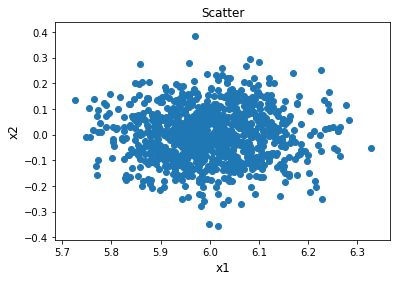

In [2]:
mean = [dart_tgt, 0]
cov = [[0.01, 0],
       [0, 0.01]
      ]

dart_loc = np.random.multivariate_normal(mean, cov, 1000)
print(dart_loc)

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("x1",size=12)
plt.ylabel("x2",size=12)
plt.title("Scatter")
plt.scatter(dart_loc[:,0], dart_loc[:,1])
plt.show()

## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。<br>

<br>

**《ヒント》**<br>
<br>
「ダーツを1000回投げる」というのは**問題1のサイコロを1000回振る**ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [3]:
from collections import defaultdict

darts_dic = defaultdict(list)

mean = [dart_tgt, 0]
cov = [[0.01, 0],
       [0, 0.01]
       ]

for _ in range(999):
    
    dart_tgt = np.random.choice(np.arange(1, 7))
    dart_loc = np.random.multivariate_normal([dart_tgt, 0], cov)
    
    darts_dic[dart_tgt].append(dart_loc)

print(len(darts_dic.values()))

6


## 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

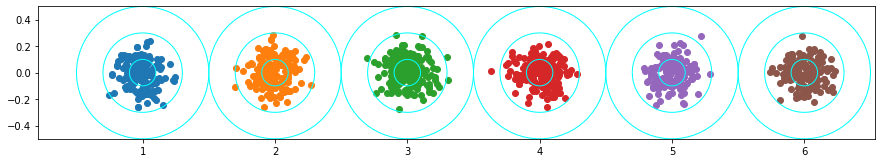

In [4]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


for i in range(1,7):

    lst = np.array(darts_dic[i])
    
    ax.scatter(lst[:, 0], lst[:, 1])
    
    c1 = patches.Circle((i, 0), 0.1, ec='cyan',fc='none')
    c2 = patches.Circle((i, 0), 0.3, ec='cyan',fc='none')
    c3 = patches.Circle((i, 0), 0.5, ec='cyan',fc='none')
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)
    
ax.set_aspect('equal')
ax.set_ylim(-0.5, 0.5)
plt.show()

## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。<br>

<br>

**《ヒント》**<br>
<br>
ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from collections import defaultdict


def throw_darts(n_tgt, n_darts):

    COV = [[0.01, 0], [0, 0.01]]

    darts_dic = defaultdict(list)

    for _ in range(n_darts - 1):

        dart_tgt = np.random.choice(np.arange(1, n_tgt + 1))
        dart_loc = np.random.multivariate_normal([dart_tgt, 0], COV)

        darts_dic[dart_tgt].append(dart_loc)

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot()

    for i in range(1, n_tgt + 1):

        x = np.array(darts_dic[i])

        ax.scatter(x[:, 0], x[:, 1])

        c1 = patches.Circle((i, 0), 0.1, ec='cyan', fc='none')
        c2 = patches.Circle((i, 0), 0.3, ec='cyan', fc='none')
        c3 = patches.Circle((i, 0), 0.5, ec='cyan', fc='none')
        ax.add_patch(c1)
        ax.add_patch(c2)
        ax.add_patch(c3)

    ax.set_aspect('equal')
#     ax.set_ylim(-0.5, 0.5)
    plt.show()

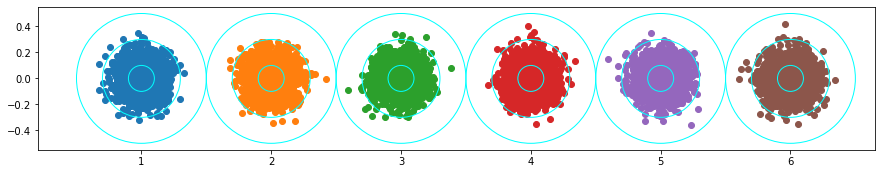

In [11]:
throw_darts(6, 10000)